In [2]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [3]:
#Guardamos y leemos los csv necesarios
steam = pd.read_csv('steam.csv')
steam_requirement = pd.read_csv("steam_requirements_data.csv")
steamspy_tag = pd.read_csv("steamspy_tag_data.csv")

In [4]:
steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [5]:
#Vamos a ver todas las categorias de los juegos de steam
#limpiamos y separamos la columna
steam["categories"] = steam["categories"].apply(lambda x: x.split(";"))


In [6]:
steam["categories"]

0        [Multi-player, Online Multi-Player, Local Mult...
1        [Multi-player, Online Multi-Player, Local Mult...
2                 [Multi-player, Valve Anti-Cheat enabled]
3        [Multi-player, Online Multi-Player, Local Mult...
4        [Single-player, Multi-player, Valve Anti-Cheat...
                               ...                        
27070                  [Single-player, Steam Achievements]
27071                                      [Single-player]
27072    [Single-player, Multi-player, Co-op, Shared/Sp...
27073                         [Single-player, Steam Cloud]
27074                         [Single-player, Steam Cloud]
Name: categories, Length: 27075, dtype: object

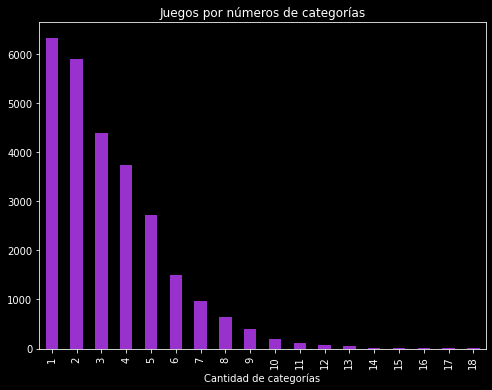

In [7]:
#vemos cuantas categorias tiene cada juego
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,6))
    steam["categories"].apply(lambda x: len(x)).value_counts().plot(kind = "bar", color="DarkOrchid")
    plt.xlabel("Cantidad de categorías")
    plt.ylabel("")
    plt.title("Juegos por números de categorías")
    plt.show()


In [8]:
#vamos sacar todas las categorias existentes
def get_labels(data):
  unique_labels = []
  all_labels = []

  for i in range(len(data)):
    for label in data[i]:
      all_labels.append(label)
      if label not in unique_labels:
        unique_labels.append(label)
  return unique_labels, all_labels
unique_cats, all_cats = get_labels(steam["categories"])

In [9]:
unique_cats[:10]

['Multi-player',
 'Online Multi-Player',
 'Local Multi-Player',
 'Valve Anti-Cheat enabled',
 'Single-player',
 'Steam Cloud',
 'Steam Achievements',
 'Steam Trading Cards',
 'Captions available',
 'Partial Controller Support']

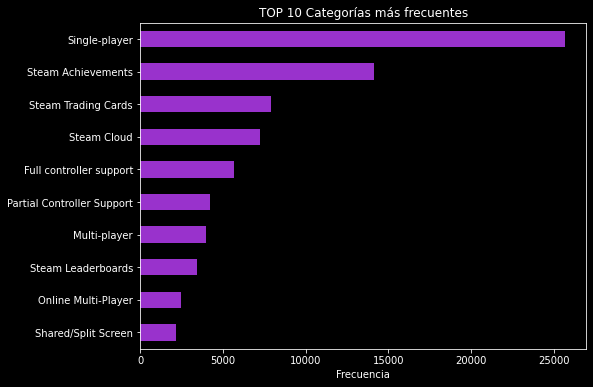

In [10]:
#Hacemos una comparativa de los TOP10 categorias
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,6))
    pd.Series(all_cats).value_counts()[:10].plot(kind="barh", color="DarkOrchid")
    plt.gca().invert_yaxis()
    plt.xlabel("Frecuencia")
    plt.title("TOP 10 Categorías más frecuentes")
plt.show()


In [11]:
#veamos la cantidad de juegos gratiutos en steam
gratis, no_es_gratis = steam[steam["price"] == 0].shape[0], steam[steam["price"] != 0].shape[0]
labels = ["Gratuito", "De pago"]
fig = go.Figure(data=[go.Bar(x=labels, y=[gratis, no_es_gratis], marker_color="DarkOrchid")])
fig.update_layout(
    height=600, width=400, title_text="Frecuencia De Juegos Gratis y De Pago",
    title_x = 0.5,
    font=dict(
            size=14,
            color="white"),
    paper_bgcolor = "black"
)

fig.show()


In [12]:
#Juegos con un coste inferior a 10 euros
costo10, costo100 = steam[steam["price"] <= 10].shape[0], steam[steam["price"] > 10].shape[0]
labels = ["10€ o menos", "Más de 10€"]
fig = go.Figure(data=[go.Bar(x=labels, y=[costo10, costo100], marker_color="DarkOrchid")])
fig.update_layout(
    height=600, width=400, title_text="Juegos con un coste menor a 10€",
    title_x = 0.5,
    font=dict(
            size=14,
            color="white"),
    paper_bgcolor = "black"
)

fig.show()

In [13]:
#Convertimos las fechas
steam['release_date'] = pd.to_datetime(steam['release_date'])

In [14]:
#Cuantos juegos sacan por año en steam
fig = go.Figure()
fig.add_trace(go.Bar(x = steam["release_date"].dt.year.value_counts().index[:12],
                     y  = steam["release_date"].dt.year.value_counts().values[:12],
                     marker_color = "DarkOrchid" ))
fig.update_layout(
    height=600, width=800, title_text="Juegos por año", title_x = 0.5, paper_bgcolor = "black", font=dict(
            size=14,
            color="white")
)
fig.show()

In [15]:
#Sacamos una variable con el top 6 criticas positivas
positivas =  steam[["name", "positive_ratings"]]
positive = positivas.sort_values(by="positive_ratings", ascending=False)[:6]
positive = positive.sort_values("positive_ratings")
positive

,name,positive_ratings
2478,Grand Theft Auto V,329061
121,Garry's Mod,363721
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,496184
19,Team Fortress 2,515879
22,Dota 2,863507
25,Counter-Strike: Global Offensive,2644404


c:\Users\Bustos_Traceur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



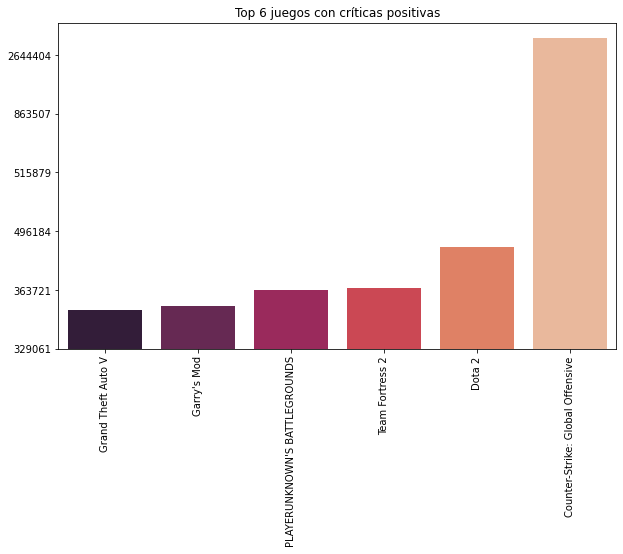

In [16]:
#Los 6 juegos con mas criticas positivas
fig,ax = plt.subplots(figsize=(10,6))
sns.set_palette("rocket")
sns.barplot(
    x=positive["name"],
    y=positive["positive_ratings"],
    palette="rocket"
)

plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title("Top 6 juegos con críticas positivas")
ax.set_yticklabels(positive['positive_ratings']);


In [17]:
#Sacamos ahora las negativas
negativas =  steam[["name", "negative_ratings"]]
negative = negativas.sort_values(by="negative_ratings", ascending=False)[:6]
negative = negative.sort_values("negative_ratings")
negative

,name,negative_ratings
1506,DayZ,77169
7809,Z1 Battle Royale,91664
2478,Grand Theft Auto V,139308
22,Dota 2,142079
25,Counter-Strike: Global Offensive,402313
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,487076


c:\Users\Bustos_Traceur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



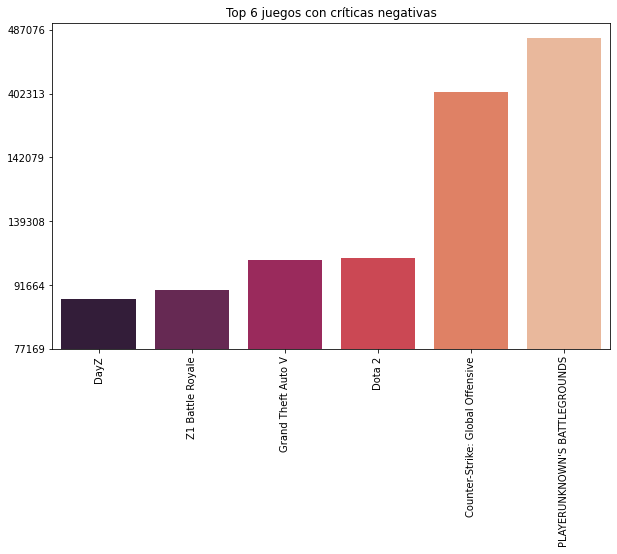

In [18]:
#top 6 juegos con mas criticas negativas
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(
    x=negative["name"],
    y=negative["negative_ratings"],
    palette = "rocket"
)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title("Top 6 juegos con críticas negativas")
ax.set_yticklabels(negative["negative_ratings"]);

In [19]:
#Vamos a sacar los juegos con mayor promedio de horas jugadas
media = steam[["name", "average_playtime"]]
media_horas = media.sort_values(by="average_playtime", ascending=False)[:5]
media_horas

,name,average_playtime
9201,The Abbey of Crime Extensum,190625
1478,The Banner Saga: Factions,95245
6014,The Secret of Tremendous Corporation,95242
8969,PRICE,63481
3930,Boundless,55204


In [20]:
#Aqui vemos que algo no cuadra, no se pueden tener tantas horas jugadas
fig = go.Figure()
fig.add_trace(go.Bar(x = media_horas["name"],
                     y  = media_horas["average_playtime"],
                     marker_color = "DarkOrchid",
                      ))
fig.update_layout(
    height=600, width=800, title_text="Top 5 juegos con mayor promedio de horas jugadas", title_x = 0.5,paper_bgcolor = "black", font=dict(
            size=14,
            color="white")
)
fig.show()

In [22]:
media2 = steam[["name", "average_playtime", "owners"]]
media_horas2 = media2.sort_values(by="owners", ascending=False)[:5]
media_horas2

,name,average_playtime,owners
25,Counter-Strike: Global Offensive,22494,50000000-100000000
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,22938,50000000-100000000
258,Call of Duty®: Modern Warfare® 2,999,5000000-10000000
2602,A Story About My Uncle,193,5000000-10000000
903,Borderlands 2,3276,5000000-10000000


In [24]:
#top juegos y sus media de horas jugadas
media2 = steam[["name", "average_playtime", "owners"]]
media_horas2 = media2.sort_values(by="owners", ascending=False)[:5]
media_horas2
fig = go.Figure()
fig.add_trace(go.Bar(x = media_horas2["name"],
                     y  = media_horas2["average_playtime"],
                     marker_color = "DarkOrchid",
                      ))
fig.update_layout(
    height=600, width=800, title_text="Top 5 juegos con mayor promedio de horas jugadas", title_x = 0.5,paper_bgcolor = "black", font=dict(
            size=14,
            color="white")
)
fig.show()

In [ ]:
#Limpiamos la columna tags
steam["steamspy_tags"] = steam["steamspy_tags"].apply(lambda x: x.split(";"))

In [ ]:
#Separamos los tags
unique_tags, all_tags = get_labels(steam["steamspy_tags"])
unique_tags[:10]

['Action',
 'FPS',
 'Multiplayer',
 'World War II',
 'Sci-fi',
 'Classic',
 'Singleplayer',
 'Puzzle',
 'First-Person',
 'Free to Play']

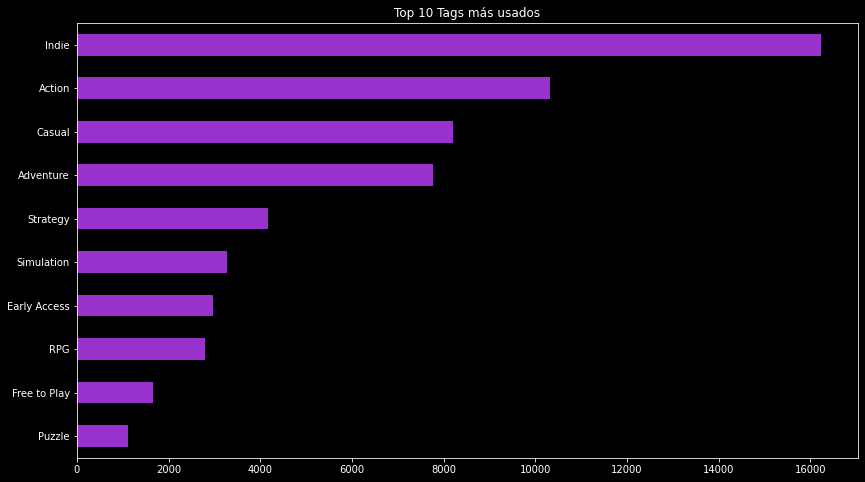

In [ ]:
#Top 10 tags mas usados en steam

with plt.style.context('dark_background'):
    plt.figure(figsize = (14, 8))
    pd.Series(all_tags).value_counts().head(10).plot(kind = 'barh', color="DarkOrchid")
    plt.gca().invert_yaxis()
    plt.xlabel("")
    plt.title("Top 10 Tags más usados")
plt.show()

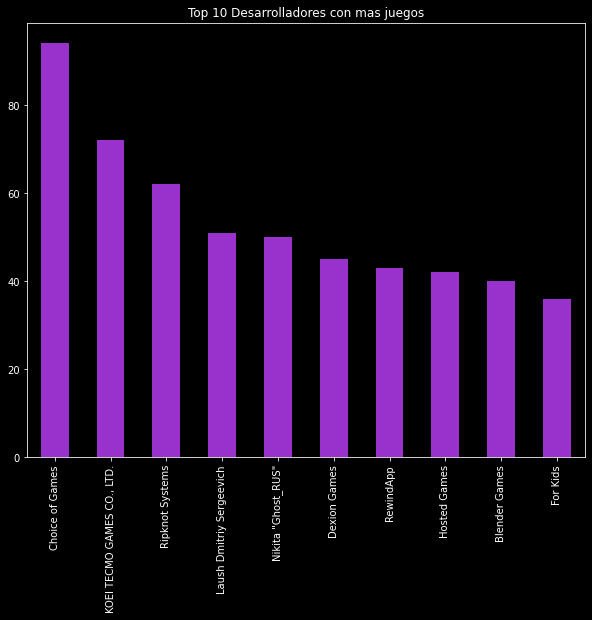

In [ ]:
#Ahora sacamos los desarrolladores de steam con mas juegos

with plt.style.context('dark_background'):
    plt.figure(figsize = (10, 8))
    steam['developer'].value_counts().sort_values(ascending=False).head(10).plot(kind="bar", color="DarkOrchid")
    plt.xlabel("")
    plt.title("Top 10 Desarrolladores con mas juegos")
plt.show()

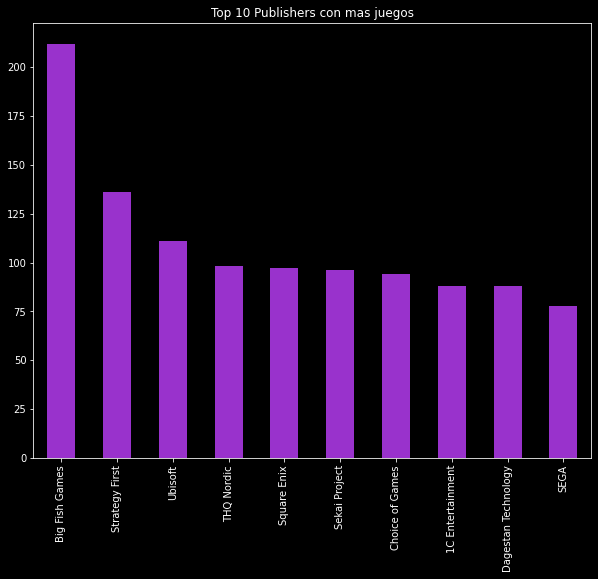

In [ ]:
#Ahora sacamos los publishers de steam con mas juegos

with plt.style.context('dark_background'):
    plt.figure(figsize = (10, 8))
    steam['publisher'].value_counts().sort_values(ascending=False).head(10).plot(kind="bar", color="DarkOrchid")
    plt.xlabel("")
    plt.title("Top 10 Publishers con mas juegos")
plt.show()

In [ ]:
steam["owners"] = steam["owners"].str.split('-').apply(lambda x: x[0]).astype(int)